第一大和第二大点的中心坐标为: (1142, 1608)
选中的四个点的坐标为:
(1145, 1132)
(819, 1270)
(1470, 1272)
(1603, 1610)

处理result1到result5的平均结果:
坐标(1145, 1132)对应的平均数值为: 1409.8
坐标(819, 1270)对应的平均数值为: 10423.8
坐标(1470, 1272)对应的平均数值为: 1052.0
坐标(1603, 1610)对应的平均数值为: 439.6

处理result6到result10的平均结果:
坐标(1145, 1132)对应的平均数值为: 686.2
坐标(819, 1270)对应的平均数值为: 9188.4
坐标(1470, 1272)对应的平均数值为: 1151.2
坐标(1603, 1610)对应的平均数值为: 282.0

处理result11到result15的平均结果:
坐标(1145, 1132)对应的平均数值为: 1053.0
坐标(819, 1270)对应的平均数值为: 8798.6
坐标(1470, 1272)对应的平均数值为: 1569.6
坐标(1603, 1610)对应的平均数值为: 304.0

处理result16到result20的平均结果:
坐标(1145, 1132)对应的平均数值为: 1393.0
坐标(819, 1270)对应的平均数值为: 11145.8
坐标(1470, 1272)对应的平均数值为: 2122.0
坐标(1603, 1610)对应的平均数值为: 275.4

处理result21到result25的平均结果:
坐标(1145, 1132)对应的平均数值为: 1730.4
坐标(819, 1270)对应的平均数值为: 11521.2
坐标(1470, 1272)对应的平均数值为: 2518.4
坐标(1603, 1610)对应的平均数值为: 242.4

处理result26到result30的平均结果:
坐标(1145, 1132)对应的平均数值为: 2530.6
坐标(819, 1270)对应的平均数值为: 11160.2
坐标(1470, 1272)对应的平均数值为: 2853.4
坐标(1603, 1610)对应的平均数值为: 266.2

处理result31到re

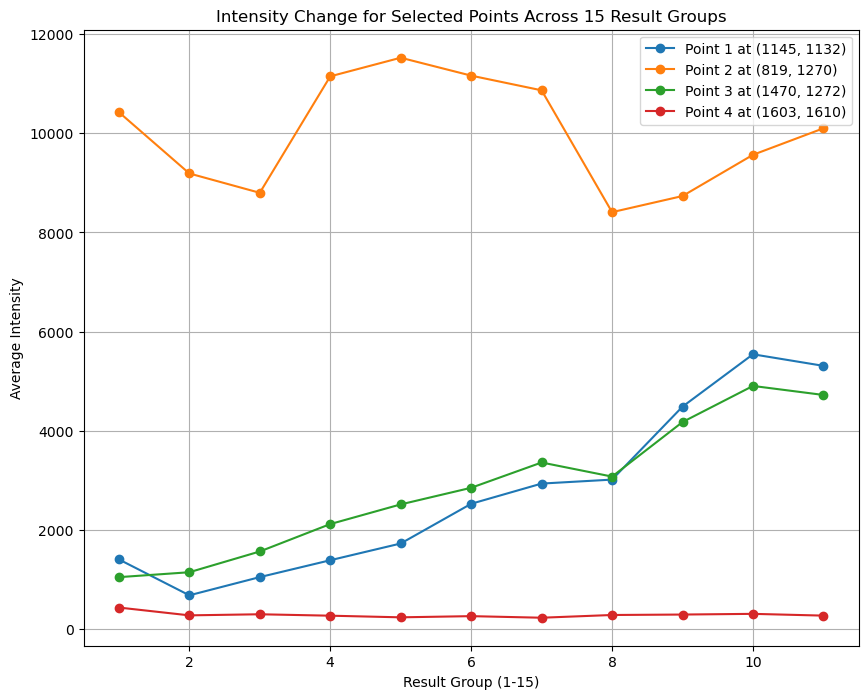

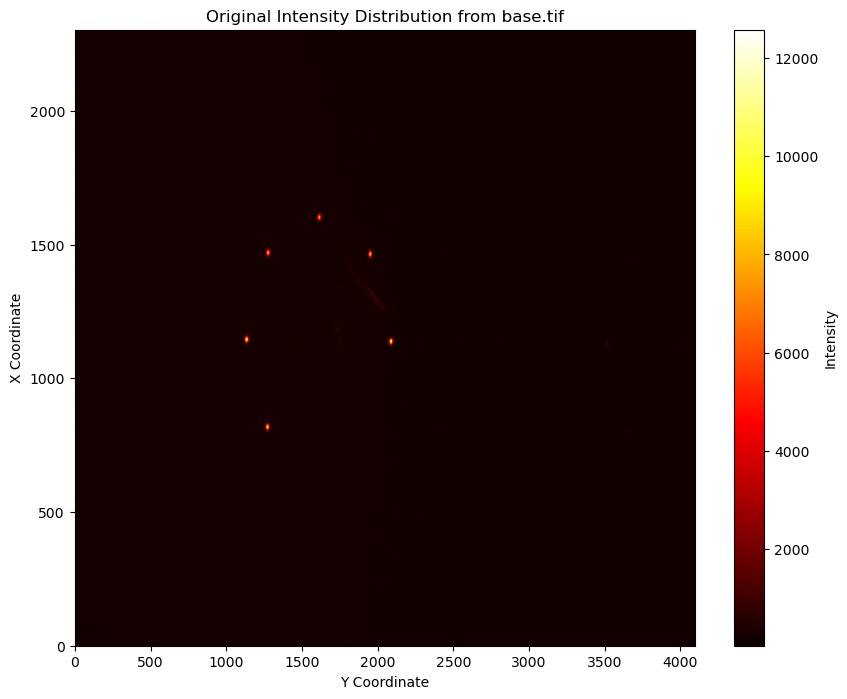

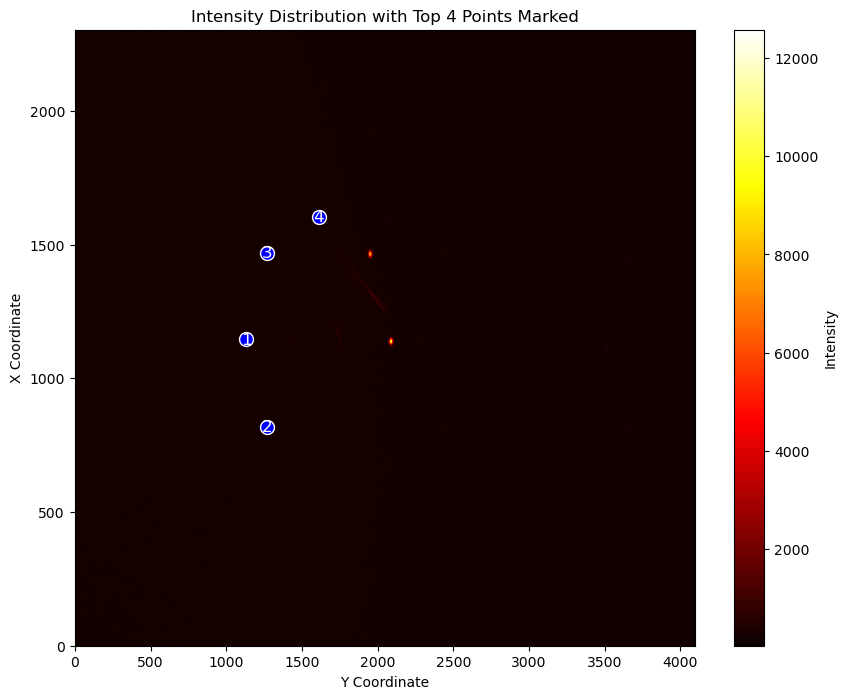

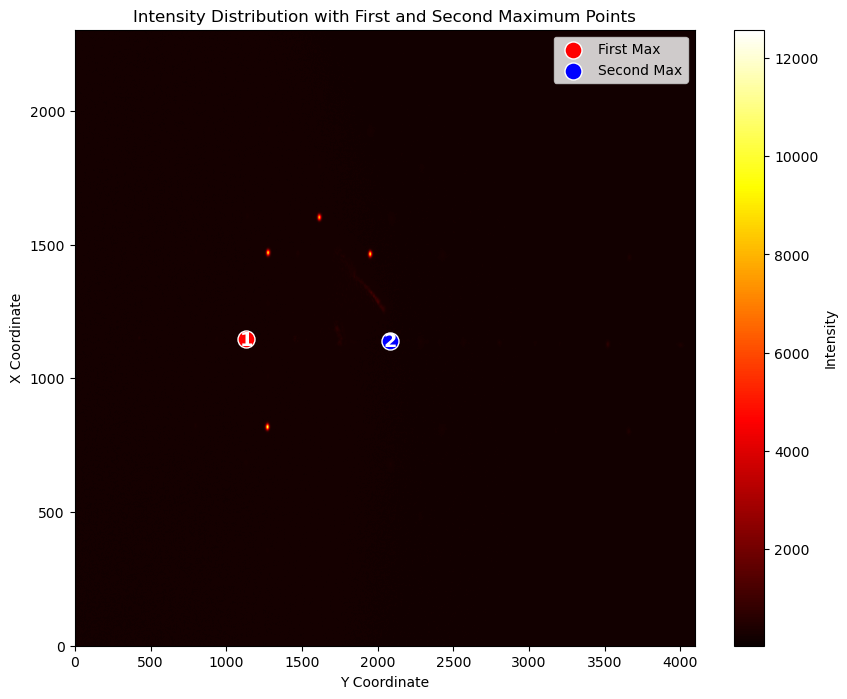

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'E:\桌面\wkx1\程序\HCL\9.11 距离21.5到20.5\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：读取result1到result75图片，按每5个做一次平均
result_path = r'E:\桌面\wkx1\程序\HCL\9.11 距离21.5到20.5'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成15组平均结果

for group in range(num_groups):
    result_avg = None
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

    # 计算该组的平均值
    result_avg /= group_size

    # 获取之前选定点的平均数值
    selected_values = []
    print(f"\n处理result{start_index}到result{start_index + group_size - 1}的平均结果:")
    for position in selected_positions:
        value = result_avg[position]
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的平均数值为: {value}")

# 第三步：绘制四个光强点的数值变化在同一张图中
plt.figure(figsize=(10, 8))
for i, position in enumerate(selected_positions, start=1):
    plt.plot(range(1, num_groups + 1), value_changes[position], marker='o', linestyle='-', label=f'Point {i} at {position}')

plt.title('Intensity Change for Selected Points Across 15 Result Groups')
plt.xlabel('Result Group (1-15)')
plt.ylabel('Average Intensity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 第四步：绘制图像
# 绘制base图片的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.tif')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制第一大和第二大点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记第一大和第二大光强的位置
plt.scatter(top_positions_base[0][1], top_positions_base[0][0], color='red', marker='o', s=150, edgecolor='white', label='First Max')
plt.scatter(top_positions_base[1][1], top_positions_base[1][0], color='blue', marker='o', s=150, edgecolor='white', label='Second Max')

# 在点上添加标签
plt.text(top_positions_base[0][1], top_positions_base[0][0], '1', color='white', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(top_positions_base[1][1], top_positions_base[1][0], '2', color='white', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Intensity Distribution with First and Second Maximum Points')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.legend(loc='upper right')
plt.show()


第一大和第二大点的中心坐标为: (1143, 1610)
选中的四个点的坐标为:
(1139, 2087)
(1473, 1279)
(1468, 1952)
(1604, 1615)

处理result1的结果:
坐标(1139, 2087)对应的数值为: 330
坐标(1473, 1279)对应的数值为: 415
坐标(1468, 1952)对应的数值为: 10350
坐标(1604, 1615)对应的数值为: 308


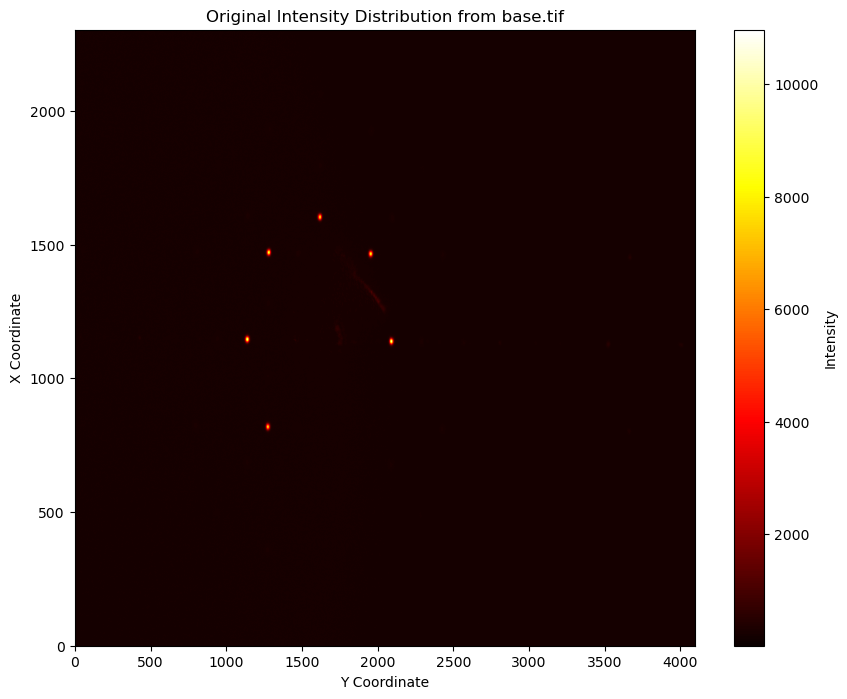

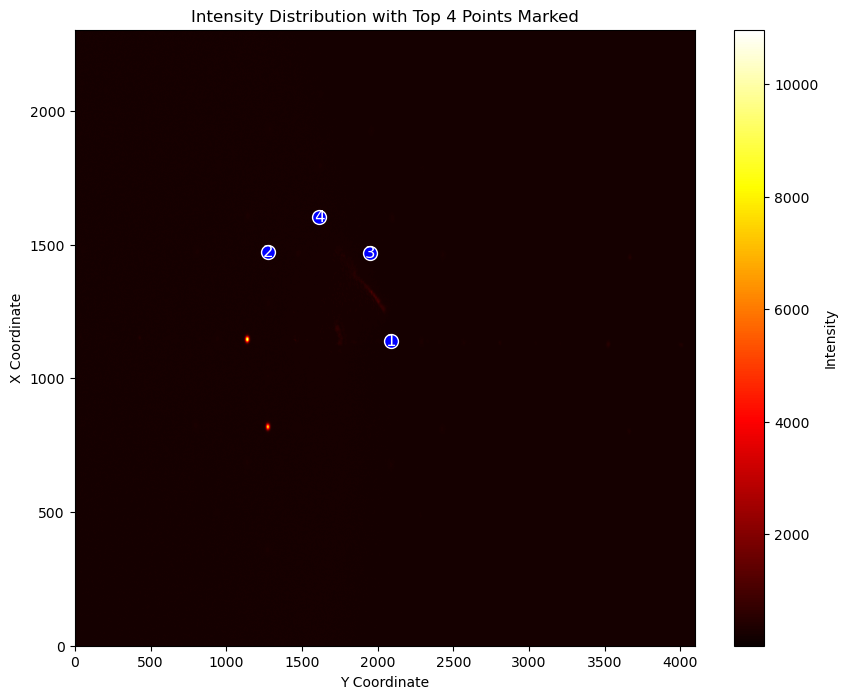

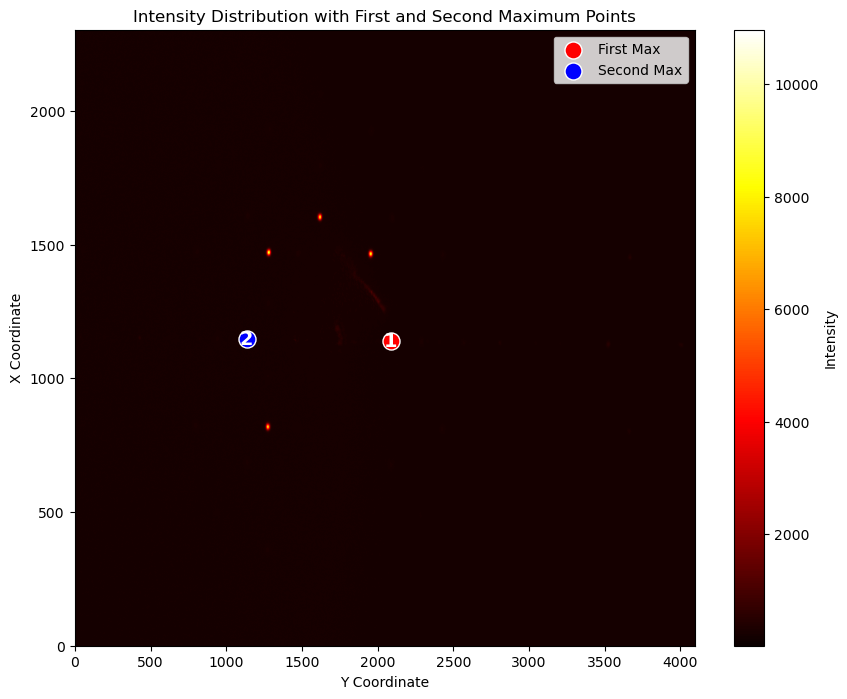

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'E:\桌面\wkx1\程序\HCL\9.11\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 第二步：读取result1.tif图片
result_file_path = r'E:\桌面\wkx1\程序\HCL\9.11\result1.tif'
result_image = Image.open(result_file_path)
result_data = np.array(result_image)

# 获取选定点的光强值
print(f"\n处理result1的结果:")
selected_values = []
for position in selected_positions:
    value = result_data[position]
    selected_values.append(value)
    print(f"坐标{position}对应的数值为: {value}")

# 第三步：绘制图像
# 绘制base图片的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.tif')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制第一大和第二大点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记第一大和第二大光强的位置
plt.scatter(top_positions_base[0][1], top_positions_base[0][0], color='red', marker='o', s=150, edgecolor='white', label='First Max')
plt.scatter(top_positions_base[1][1], top_positions_base[1][0], color='blue', marker='o', s=150, edgecolor='white', label='Second Max')

# 在点上添加标签
plt.text(top_positions_base[0][1], top_positions_base[0][0], '1', color='white', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(top_positions_base[1][1], top_positions_base[1][0], '2', color='white', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Intensity Distribution with First and Second Maximum Points')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.legend(loc='upper right')
plt.show()
